# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- ELON beats Mars retrograde with +45% rally, but here’s the catch.  As the market finally turns green enough to attract the grazing bulls again, you have to admit that it&#8217;s been a good day for meme coins like ApeCoin [APE], which rallied by more than 30% in a single day &#8211; and Dogelon Mars [ELON]. At press time, ELON was switching wallets at $0.000001143, after rocketing [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/elon-beats-mars-retrograde-with-45-rally-but-heres-the-catch/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Is it COVID or a cold? How to know as Omicron cases rise | CBC News.  With very limited access to PCR tests across Canada, some people who are getting sick are wondering if they have COVID, or a cold or the flu — and what they should do if they have COVID symptoms but don't actually feel so bad. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/covid-cold-flu-how-to-tell-the-difference-1.6410856) 

### Kainų kaita pandemijos metu

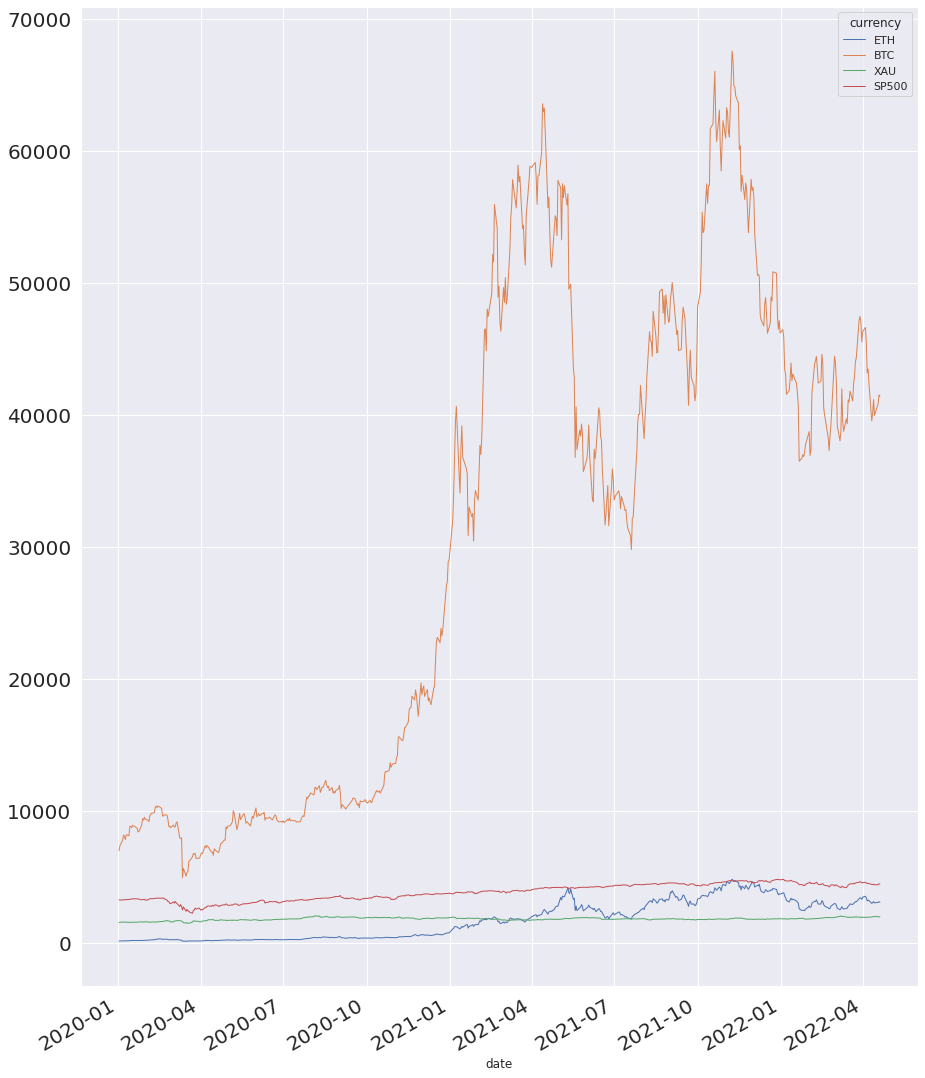

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904332,0.236832,0.923959
BTC,0.904332,1.000000,0.191809,0.873021
XAU,0.236832,0.191809,1.000000,0.369922
SP500,0.923959,0.873021,0.369922,1.000000


In [8]:
#hide ### Koreliacijos matrica.

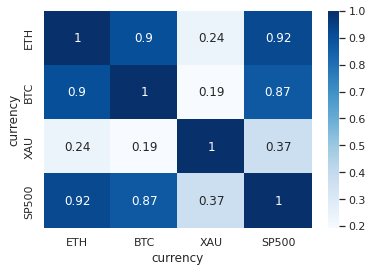

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')